######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c3b235">Bagging and Boosting
<font color=darkblue>
    
######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#d40eea">Import Libraries
<font color=darkblue>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
import sklearn
from sklearn import preprocessing
from sklearn import tree

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea0ea1">Load sample dataset

In [2]:
# df = pd.read_csv("~/Downloads/ML_classwork/DT_RF_Ensemble/Somerville-Happiness-Survey-master/data/SomervilleHappinessSurvey2015.csv", sep = ",")
df = pd.read_csv("~/Downloads/ML_classwork/DT_RF_Ensemble/Somerville-Happiness-Survey-master/data/SomervilleHappinessSurvey2015.csv", sep = ",")

df.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea0e4c">Data Shape

In [3]:
df.shape

(143, 7)

In [4]:
# label = df['label']
# for i in range(len(label)):
#     if (label[i] == '<=50K'):
#         label[i] = 0
#     elif (label[i]=='>50K'):
#         label[i] = 1
# df['label'] = label
# df.head(10)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea0e4c">Checking NULL values

In [5]:
df.isnull().values.any()

False

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#0e4cea">Data Statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
D,143.0,0.538462,0.500271,0.0,0.0,1.0,1.0,1.0
X1,143.0,4.314685,0.799820,1.0,4.0,5.0,5.0,5.0
X2,143.0,2.538462,1.118155,1.0,2.0,3.0,3.0,5.0
X3,143.0,3.265734,0.992586,1.0,3.0,3.0,4.0,5.0
X4,143.0,3.699301,0.888383,1.0,3.0,4.0,4.0,5.0
X5,143.0,3.615385,1.131639,1.0,3.0,4.0,4.0,5.0
X6,143.0,4.216783,0.848693,1.0,4.0,4.0,5.0,5.0


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#0ec2ea">Replacing Missing Values

In [7]:
# Replacing Missing Values
df.replace('?', np.nan, inplace=True)
df=df.fillna(df.mean())
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [8]:
# Handle missing values
num_missing = (df[df.columns] == 0).sum()

print(num_missing)

D     66
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
dtype: int64


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#0eeae6">Checking the Data Type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   D       143 non-null    int64
 1   X1      143 non-null    int64
 2   X2      143 non-null    int64
 3   X3      143 non-null    int64
 4   X4      143 non-null    int64
 5   X5      143 non-null    int64
 6   X6      143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#0eeac2">Print all values of particular column

In [10]:
dd = df['D']
print(*dd)

0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#0eea62">Correlation Plot

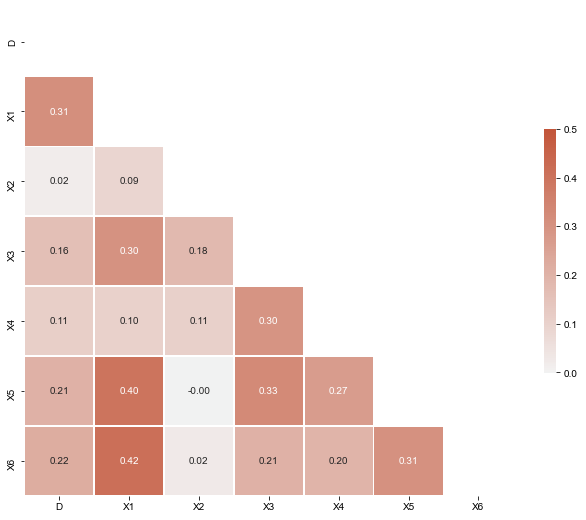

In [11]:
from string import ascii_letters
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,fmt='.2f')
sns.set(font_scale=1.1)



######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#12ea0e">Pearson Correlation Results 

In [12]:
#Correlation with output variable
cor_target = abs(corr['D']).sort_values(ascending=False)[1:]

cor_target

X1    0.312740
X6    0.220729
X5    0.206685
X3    0.163639
X4    0.113356
X2    0.019368
Name: D, dtype: float64

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#afea0e">Histograms

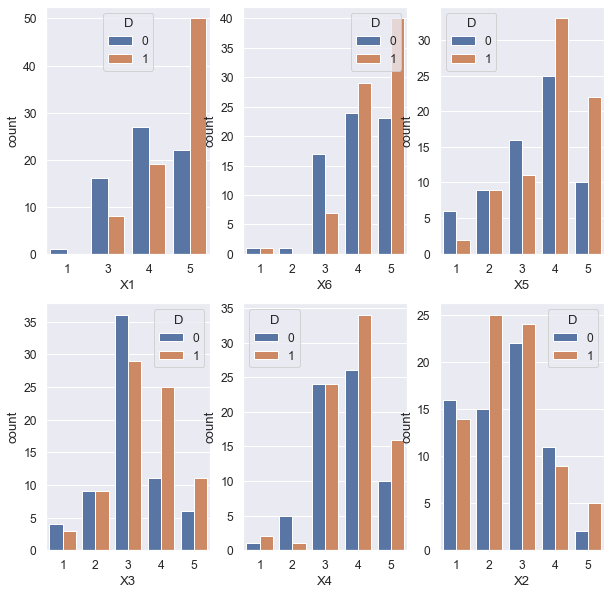

In [13]:
import math
from matplotlib import rcParams
import numpy as np

# figure size in inches
rcParams['figure.figsize'] = 10,10

def plot_multiple_countplots(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                sns.countplot(x=df[col], hue=df["D"], ax=axs)
            else:
                sns.countplot(x=df[col], hue=df["D"], ax=axs[j])
        else:
            sns.countplot(x=df[col], hue=df["D"], ax=axs[i, j])
            
            
plot_multiple_countplots(df, cor_target.keys())

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#dfea0e">Preprocessing

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
data_norm= pd.DataFrame(np_scaled, columns = df.columns)
data_norm.head()

,D,X1,X2,X3,X4,X5,X6
0,0.0,0.5,0.50,0.5,0.75,0.25,0.75
1,0.0,0.5,0.25,0.5,1.00,0.75,0.50
2,1.0,1.0,0.50,0.5,0.50,0.50,1.00
3,0.0,1.0,0.75,0.5,0.50,0.50,1.00
4,0.0,1.0,0.75,0.5,0.50,0.50,1.00


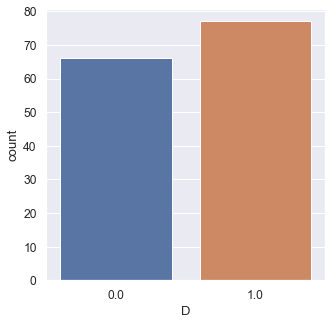

In [15]:
# figure size in inches
rcParams['figure.figsize'] = 5,5
ax = sns.countplot(x="D", data=data_norm)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#eac90e">Dendogram plot

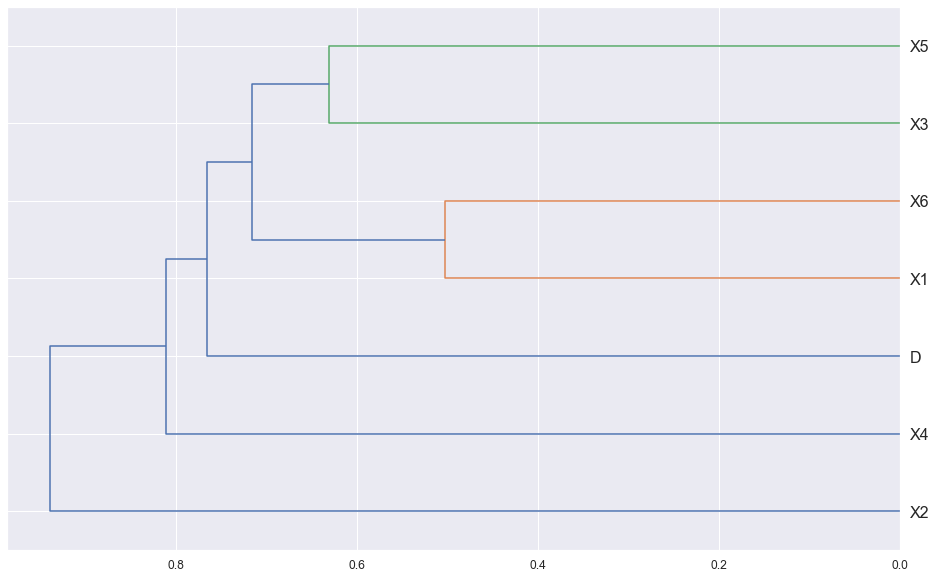

In [18]:
# Dendogram
import scipy
from scipy.cluster import hierarchy as hc
# Redundant Features
corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
plt.show()

In [59]:
# g = sns.PairGrid(df, hue = "D", vars=['X1','X2','X3','X4','X5','X6'])
# g.map(plt.scatter)
# plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#eac90e">Split Train and Test 

In [20]:
# Split Dataset into Training and Testing sets
class_df = df['D']
class_df.head()

0    0
1    0
2    1
3    0
4    0
Name: D, dtype: int64

In [21]:
features_df=df.drop('D',axis=1)
features_df.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df,class_df, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(114, 6)
(29, 6)
(114,)
(29,)


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#eaa80e">Decision Tree: Grid Search

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

param_grid = {
    'max_depth': [3, 4, 5, 6,7,8],
    'max_features' : ['auto', 'sqrt', 'log2']
}


grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_grid, cv = 3)

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': 5, 'max_features': 'sqrt'}

In [24]:
best_grid = grid_search.best_estimator_

print("Decision Trees's Accuracy: ", best_grid.score(x_test, y_test))

Decision Trees's Accuracy:  0.5517241379310345


In [25]:
grid_search.fit(x_train, y_train)
grid_search_predicted = best_grid.predict(x_test)

DT_score      = round(best_grid.score(x_train, y_train) * 100, 2)
DT_score_test = round(best_grid.score(x_test, y_test) * 100, 2)

print('Decision Tree Train Score: ', DT_score)
print('Decision Tree Test Score: ', DT_score_test)
print('Accuracy: ', (accuracy_score(y_test,grid_search_predicted)) *100)

Decision Tree Train Score:  78.95
Decision Tree Test Score:  55.17
Accuracy:  55.172413793103445


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = grid_search.predict(x_test)
con_res = confusion_matrix(y_test,y_pred)
# con_res = metrics.confusion_matrix(y_test,y_pred, labels=[0, 1])

print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Confusion matrix:
[[8 7]
 [5 9]]
Accuracy: 58.62%


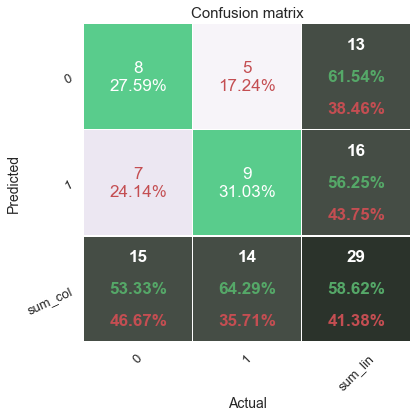

In [27]:
# %run -i '/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/confusion_matrix_different_ways1.py'
%run -i '/Users/preethamvignesh/Desktop/Work/ML_EIT/confusion_matrix_different_ways1.py'

df_confmatrx = pd.DataFrame(con_res, range(2),range(2))
df_confmatrx
cmap = 'PuRd'
confusion_matrix_dfrntway(df_confmatrx, cmap=cmap,fz=17)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#eaa80e">Bagging: Grid search

In [29]:
from sklearn.ensemble import BaggingClassifier

param_grid = {
    'max_samples': [1, 2, 3,4],
    'max_features':[1, 2, 3, 4, 5],
    'n_estimators': [50, 100, 150, 200]
}


grid_search1 = GridSearchCV(estimator = BaggingClassifier(), param_grid = param_grid, cv = 3)

grid_search1.fit(x_train, y_train)
grid_search1.best_params_

{'max_features': 1, 'max_samples': 4, 'n_estimators': 50}

In [30]:
best_grid1 = grid_search1.best_estimator_

print("Bagging's Accuracy: ", best_grid1.score(x_test, y_test))

Bagging's Accuracy:  0.6551724137931034


In [31]:
grid_search1.fit(x_train, y_train)
grid_search1_predicted = best_grid1.predict(x_test)

DT_score      = round(best_grid1.score(x_train, y_train) * 100, 2)
DT_score_test = round(best_grid1.score(x_test, y_test) * 100, 2)

print('Bagging Train Score: ', DT_score)
print('Bagging Test Score: ', DT_score_test)
print('Accuracy: ', (accuracy_score(y_test,grid_search1_predicted)) *100)

Bagging Train Score:  60.53
Bagging Test Score:  65.52
Accuracy:  65.51724137931035


In [32]:
predictions = best_grid1.predict(x_test)
confusion_matrix(y_test, predictions)

print("Confusion matrix:")
print(confusion_matrix(y_test,predictions))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Confusion matrix:
[[ 6  9]
 [ 1 13]]
Accuracy: 58.62%


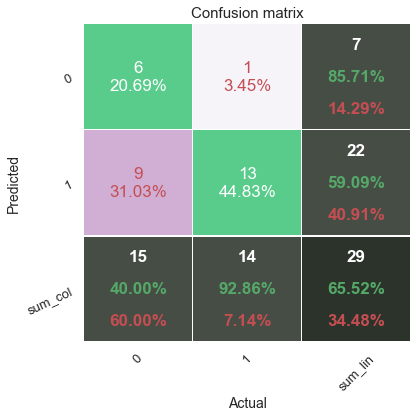

In [33]:
# %run -i '/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/confusion_matrix_different_ways1.py'
%run -i '/Users/preethamvignesh/Desktop/Work/ML_EIT/confusion_matrix_different_ways1.py'
con_res = confusion_matrix(y_test,predictions)
df_confmatrx = pd.DataFrame(con_res, range(2),range(2))
df_confmatrx
cmap = 'PuRd'
confusion_matrix_dfrntway(df_confmatrx, cmap=cmap,fz=17)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea990e">Bagging Classifier

In [34]:
#Bagging Classifier
bag = BaggingClassifier(n_estimators=5)
bag.fit(x_train, y_train.values.ravel())
y_pred_bag = bag.predict(x_test)

In [35]:
bag_score      = round(bag.score(x_train, y_train) * 100, 2)
bag_score_test = round(bag.score(x_test, y_test) * 100, 2)

print('Bagging Train Score: ', DT_score)
print('Bagging Test Score: ', DT_score_test)
print('Accuracy: ', (accuracy_score(y_test,y_pred_bag)) *100)

Bagging Train Score:  60.53
Bagging Test Score:  65.52
Accuracy:  51.724137931034484


In [36]:
predictions = bag.predict(x_test)
confusion_matrix(y_test, predictions)

print("Confusion matrix:")
print(confusion_matrix(y_test,predictions))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, predictions)*100))

Confusion matrix:
[[9 6]
 [8 6]]
Accuracy: 51.72%


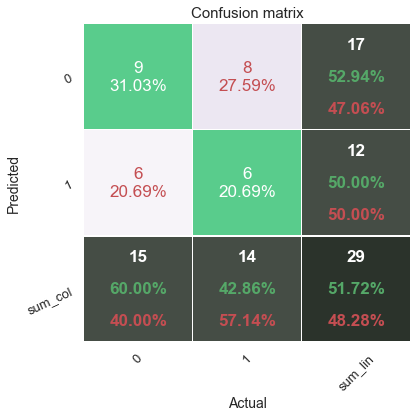

In [37]:
# %run -i '/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/confusion_matrix_different_ways1.py'
# %run -i '/Users/preethamvignesh/Desktop/Work/ML_EIT/confusion_matrix_different_ways1.py'
con_res = confusion_matrix(y_test,predictions)
df_confmatrx = pd.DataFrame(con_res, range(2),range(2))
df_confmatrx
cmap = 'PuRd'
confusion_matrix_dfrntway(df_confmatrx, cmap=cmap,fz=17)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea780e">Ada Boost Calssifier

In [38]:
#Ada Boost Classifier
ada = AdaBoostClassifier(n_estimators=5)
ada.fit(x_train, y_train.values.ravel())
y_pred_ada = ada.predict(x_test)

In [39]:
ada_score      = round(ada.score(x_train, y_train) * 100, 2)
ada_score_test = round(ada.score(x_test, y_test) * 100, 2)

print('AdaBoost Classifier Train Score: ', ada_score)
print('AdaBoost Classifier Test Score: ',ada_score_test)
print('Accuracy: ', (accuracy_score(y_test,y_pred_ada)) *100)

AdaBoost Classifier Train Score:  64.04
AdaBoost Classifier Test Score:  55.17
Accuracy:  55.172413793103445


In [40]:
predictions = ada.predict(x_test)
confusion_matrix(y_test, predictions)

print("Confusion matrix:")
print(confusion_matrix(y_test,predictions))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, predictions)*100))

Confusion matrix:
[[7 8]
 [5 9]]
Accuracy: 55.17%


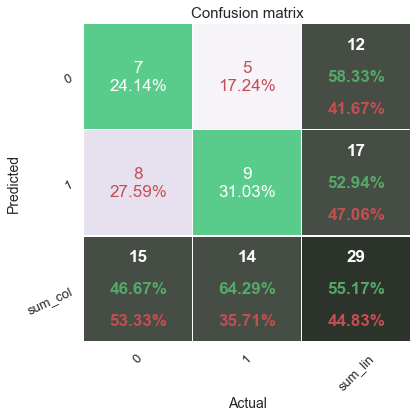

In [41]:
con_res = confusion_matrix(y_test,predictions)
df_confmatrx = pd.DataFrame(con_res, range(2),range(2))
df_confmatrx
cmap = 'PuRd'
confusion_matrix_dfrntway(df_confmatrx, cmap=cmap,fz=17)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea780e">Support Vector Machine (SVM)

In [43]:
from sklearn import svm
clf = svm.SVC()

In [44]:
clf.fit(x_train, y_train)
clf_predicted = clf.predict(x_test)

svc_score      = round(clf.score(x_train, y_train) * 100, 2)
svc_score_test = round(clf.score(x_test, y_test) * 100, 2)

print('SVC Score: ', svc_score)
print('SVC Test Score: ', svc_score_test)
print('Accuracy: ', (accuracy_score(y_test,clf_predicted)) *100,4)

SVC Score:  75.44
SVC Test Score:  51.72
Accuracy:  51.724137931034484 4


In [45]:
predictions = clf.predict(x_test)
confusion_matrix(y_test, predictions)

print("Confusion matrix:")
print(confusion_matrix(y_test,predictions))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, predictions)*100))

Confusion matrix:
[[ 3 12]
 [ 2 12]]
Accuracy: 51.72%


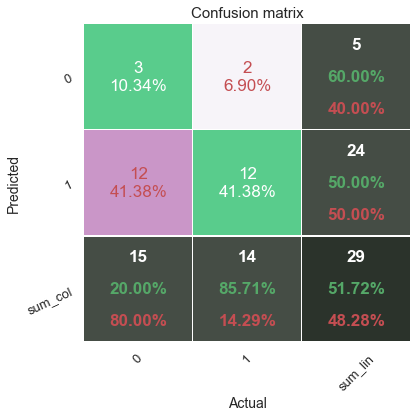

In [46]:
con_res = confusion_matrix(y_test,predictions)
df_confmatrx = pd.DataFrame(con_res, range(2),range(2))
df_confmatrx
cmap = 'PuRd'
confusion_matrix_dfrntway(df_confmatrx, cmap=cmap,fz=17)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea6a0e">Support Vector Machine (SVM)(Kernel=Linear)

In [48]:
clf_linear = svm.SVC(kernel='linear')

In [49]:
clf_linear.fit(x_train, y_train)
clf_linear_predicted = clf_linear.predict(x_test)

svc_linear_score      = round(clf_linear.score(x_train, y_train) * 100, 2)
svc_linear_score_test = round(clf_linear.score(x_test, y_test) * 100, 2)

print('SVC Linear Score: ', svc_linear_score)
print('SVC Linear Test Score: ', svc_linear_score_test)
print('Accuracy: ', (accuracy_score(y_test,clf_linear_predicted)) *100,4)

SVC Linear Score:  65.79
SVC Linear Test Score:  58.62
Accuracy:  58.620689655172406 4


In [50]:
pred_linear = clf_linear.predict(x_test)
confusion_matrix(y_test, pred_linear)

print("Confusion matrix:")
print(confusion_matrix(y_test,pred_linear))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, pred_linear)*100))

Confusion matrix:
[[ 6  9]
 [ 3 11]]
Accuracy: 58.62%


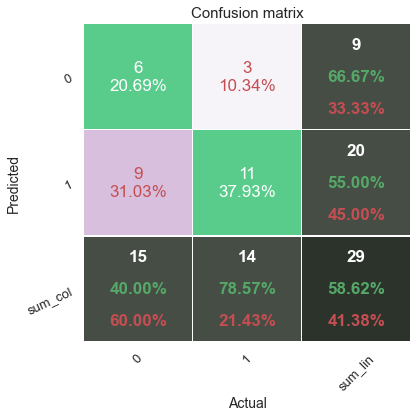

In [51]:
con_res = confusion_matrix(y_test,pred_linear)
df_confmatrx = pd.DataFrame(con_res, range(2),range(2))
df_confmatrx
cmap = 'PuRd'
confusion_matrix_dfrntway(df_confmatrx, cmap=cmap,fz=17)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea570e">Support Vector Machine (SVM) (Kernel=Poly)

In [53]:
clf_poly = svm.SVC(kernel='poly')

In [54]:
clf_poly.fit(x_train, y_train)
clf_poly_predicted = clf_poly.predict(x_test)

svc_poly_score      = round(clf_poly.score(x_train, y_train) * 100, 2)
svc_poly_score_test = round(clf_poly.score(x_test, y_test) * 100, 2)

print('SVC Poly Score: ', svc_poly_score)
print('SVC Poly Test Score: ', svc_poly_score_test)
print('Accuracy: ', (accuracy_score(y_test,clf_poly_predicted)) *100,4)

SVC Poly Score:  75.44
SVC Poly Test Score:  58.62
Accuracy:  58.620689655172406 4


In [55]:
pred_poly = clf_poly.predict(x_test)
confusion_matrix(y_test, pred_poly)

print("Confusion matrix:")
print(confusion_matrix(y_test,pred_poly))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, pred_poly)*100))

Confusion matrix:
[[ 7  8]
 [ 4 10]]
Accuracy: 58.62%


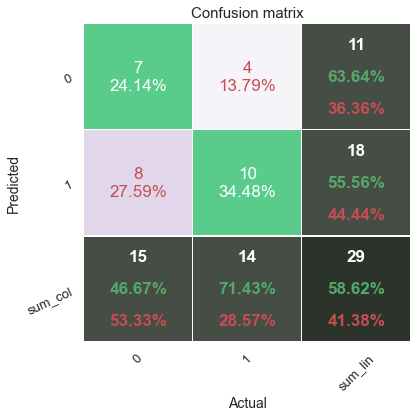

In [56]:
con_res = confusion_matrix(y_test,pred_poly)
df_confmatrx = pd.DataFrame(con_res, range(2),range(2))
df_confmatrx
cmap = 'PuRd'
confusion_matrix_dfrntway(df_confmatrx, cmap=cmap,fz=17)